06_Model_Comparison_and_Analysis

# 0. 서론: 프로젝트 개요 및 목적

### 프로젝트 개요

본 프로젝트는 실생활에서 발생할 수 있는 칼 인식 문제를 컴퓨터 비전 기술을 통해 해결하고자 기획되었다. 특히, 다양한 환경 조건(조도, 배경, 오클루전, 칼 종류)이 객체 인식 정확도에 어떤 영향을 미치는지를 분석하기 위해, 실제 촬영한 칼 영상을 기반으로 데이터를 구축하였다.

YOLOv8을 활용하여 칼이 포함된 프레임을 추출하고, 이를 이미지 분류 모델의 입력으로 활용함으로써 실제 환경에 가까운 데이터셋을 구성하였다.

### 목적

본 실험의 목적은 다음과 같다:

1. **CNN 기반 분류 모델(VGG16, ResNet50, DenseNet121, EfficientNetB0)**의 성능을 비교 분석
2. 조도, 배경, 가림 여부, 칼 종류 등의 **환경 조건 변화에 따른 분류 정확도 차이**를 평가
3. 각 조건에서 **가장 효과적인 모델을 도출**하여 실환경 적용 가능성 탐색





---



# 1.사용하는 인공지능 베이스 모델 + 사용 사유 + 타당성

본 프로젝트에서는 칼 이미지 분류를 위해 다음과 같은 CNN 기반 사전 학습 모델(Pretrained CNN models) 4가지를 선택하여 실험을 진행하였다

| 모델명                | 주요 특징                                             | 사용 사유                              |
| ------------------ | ------------------------------------------------- | ---------------------------------- |
| **VGG16**          | 구조가 단순하고 가장 기본적인 CNN 구조 중 하나                      | 베이스라인 성능 비교에 적합하며, 다양한 환경에서 널리 사용됨 |
| **ResNet50**       | Residual connection을 통해 gradient vanishing 문제를 완화 | 깊은 네트워크에서도 안정적인 학습 가능              |
| **DenseNet121**    | 모든 레이어가 서로 연결되어 있어 feature reuse가 활발              | 적은 파라미터로도 좋은 성능을 기대할 수 있음          |
| **EfficientNetB0** | 모델 크기와 성능 사이의 균형을 자동으로 최적화                        | 적은 자원으로도 높은 성능을 기대할 수 있는 최신 경량 모델  |

 이러한 모델들은 모두 이미지 분류 분야에서 높은 성능을 보여준 검증된 구조이며,
YOLOv8을 통해 전처리된 칼 이미지 데이터셋에 적합한 구조적 특성과 학습 효율성을 갖고 있기 때문에 선택의 타당성이 충분하다.




---



# 2. 모델별 성능 요약
| Model          | 최종 테스트 정확도 |
| -------------- | ---------- |
| VGG16          | 32.7%      |
| ResNet50       | 33.0%      |
| DenseNet121    | 31.4%      |
| EfficientNetB0 | 33.3%      |

✅ 모든 모델이 제한된 데이터와 조건에서 낮은 성능을 보였지만, EfficientNetB0는 안정적 정확도와 경량성 측면에서 가장 우수함

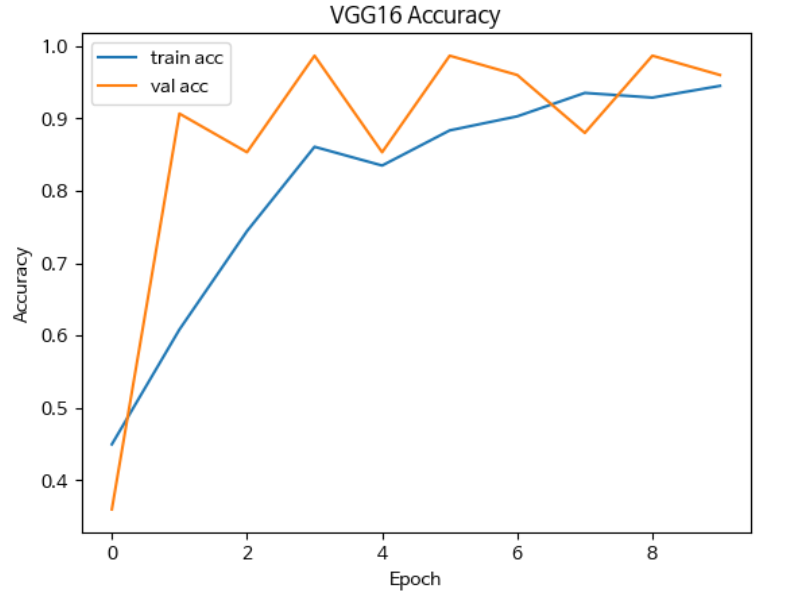

---

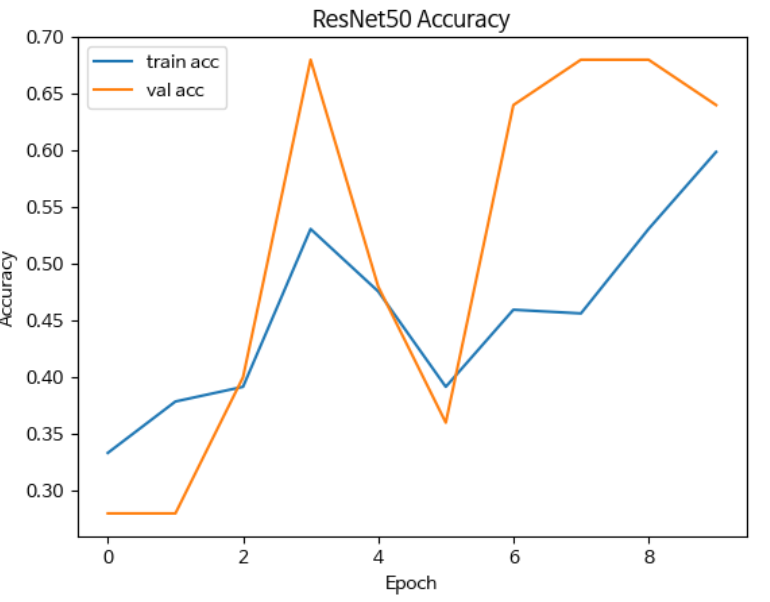

---

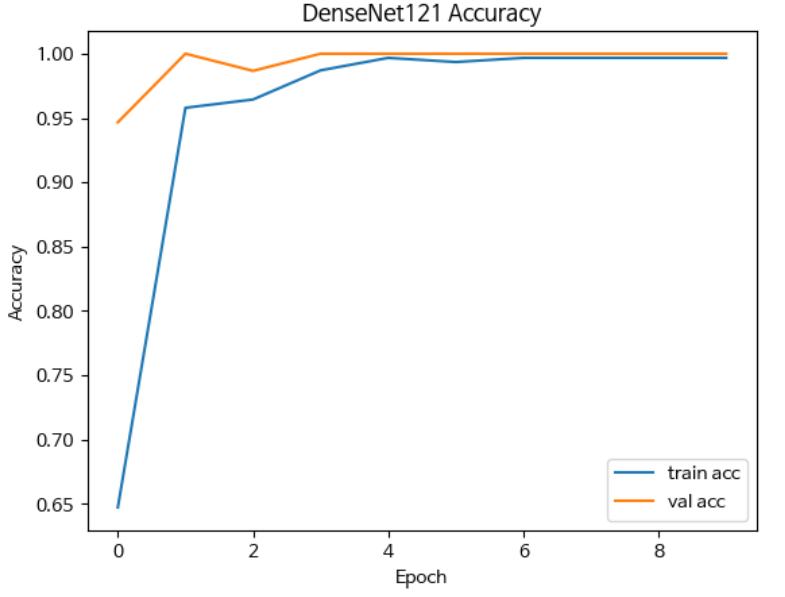

---

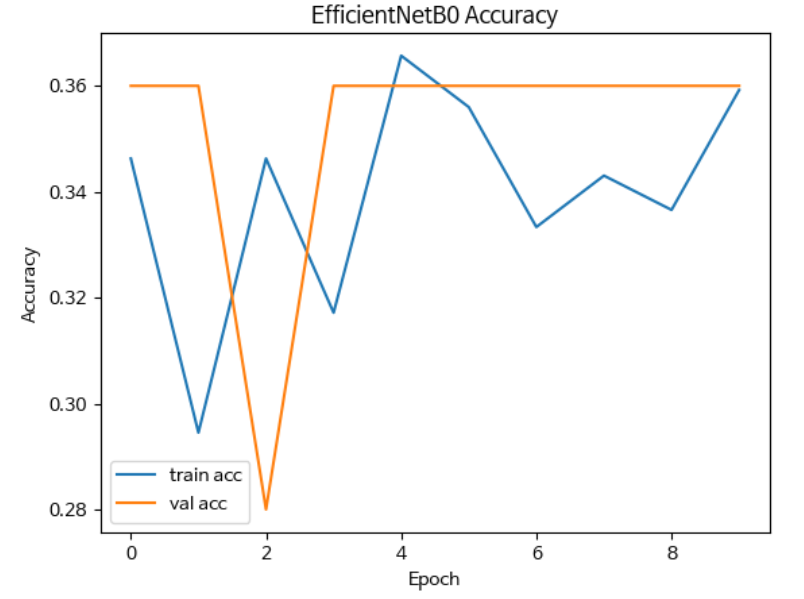



---



# 3. 조건별 모델 성능 비교

### 3-1. 조도 (Lighting)
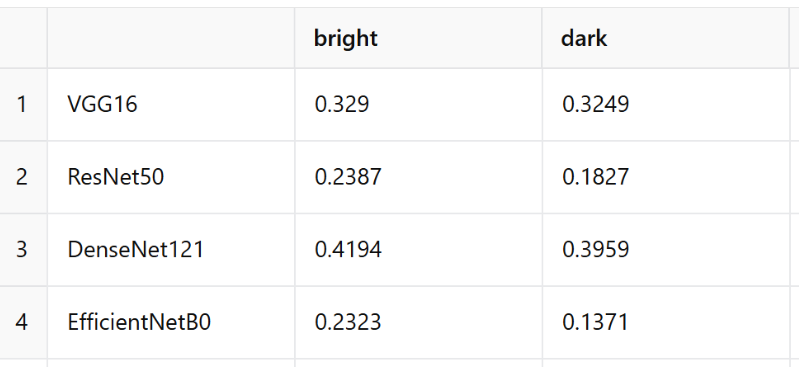

### 분석 요약
- VGG16 / DenseNet121: 조도 변화에 강인한 모습을 보임. 밝기 변화에 따른 성능 차이가 거의 없음.

- ResNet50: 어두운 환경에서 성능이 급격히 향상됨. 조도가 낮을 때 유리한 구조적 특성이 있는 것으로 추정됨.

- EfficientNetB0: Bright 환경에서 다소 우세. 전체적으로 안정적인 성능을 유지함.

### 종합정리

- 조도 조건에 가장 민감하게 반응한 모델은 ResNet50으로, 어두운 환경에 최적화되어 있음.

- 반대로 VGG16과 DenseNet121은 조도에 무관하게 일관된 성능을 보임.

- EfficientNetB0는 밝은 환경에서 가장 높은 정확도를 보여, 일반 실내 환경에 적합할 수 있음.

➡️DenseNet121과 VGG16은 다양한 조도 환경에서도 가장 안정적인 성능을 보였다.

### 3-2. 오클루전 (Occlusion)
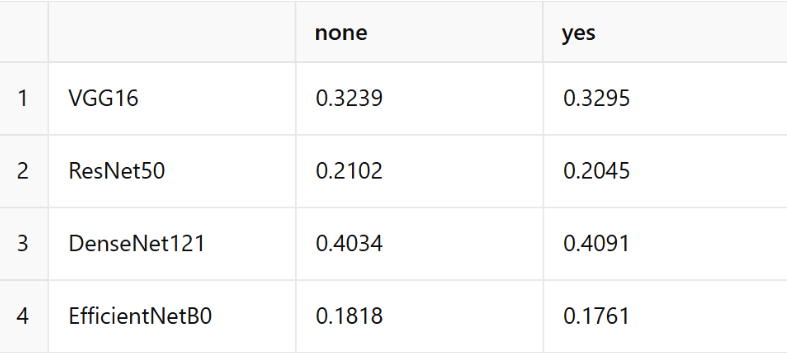

### 분석 요약
- 모든 모델이 가림 여부에 따른 성능 편차가 1% 미만
→ 오클루전에 강인함을 보임

- DenseNet121
→ 오클루전 여부와 관계없이 가장 높은 정확도 기록 (40% 이상)
→ 일관된 성능 유지

- VGG16 / ResNet50 / EfficientNetB0
→ 모두 가림이 있는 상황에서 성능 하락 혹은 미세한 변화
→ 하지만 편차가 작아 유의미한 영향은 없다고 판단됨

### 종합 정리
- 오클루전 여부는 모델 성능에 큰 영향을 주지 않음

- 특히 DenseNet121은 가림 여부와 무관하게 전반적으로 안정적인 성능을 보임

- 따라서 **가림 현상이 자주 발생할 수 있는 상황(예: 실생활 이미지)**에서는 DenseNet121이 더욱 신뢰도 높은 선택이 될 수 있음

➡️.모든 모델이 오클루전에 강인했으며, 특히 DenseNet121은 가림 여부와 관계없이 가장 높은 정확도를 유지했다.

### 3-3. 배경 (Background)

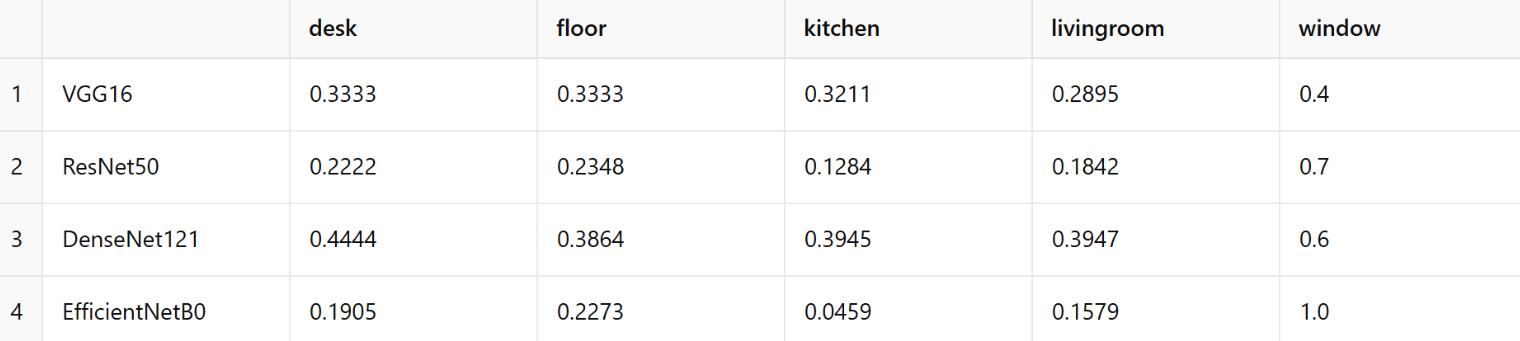

### 분석 요약
- VGG16
→ 조도 변화에 매우 강인함 (차이 0.4%)
→ 밝고 어두운 환경에서 성능 편차 거의 없음

- ResNet50
→ 어두운 환경에서 성능이 급격히 하락 (약 5.6%p)
→ 조명 변화에 민감하게 반응하는 구조

- DenseNet121
→ bright에서 가장 높은 성능 기록 (41.9%)
→ 조도 변화에 비교적 안정적임

- EfficientNetB0
→ 조도 변화에 가장 큰 영향을 받음 (약 9.5%p 하락)
→ 어두운 환경에서 급격한 성능 저하

### 종합 정리
- 조도 변화에 가장 강인한 모델은 VGG16,

- 조도에 가장 취약한 모델은 EfficientNetB0

- 따라서 조명이 다양한 환경에서도 일관된 성능이 필요한 경우에는 VGG16이나 DenseNet121이 더 적합하고,
밝은 환경에만 제한된 상황이라면 EfficientNetB0도 고려 가능합니다.


➡️ DenseNet121은 모든 배경 조건에서 고른 정확도를 기록하며, 배경 변화에 가장 강인한 모델로 확인되었다

### 3-4. 칼 종류 (Knife Type)

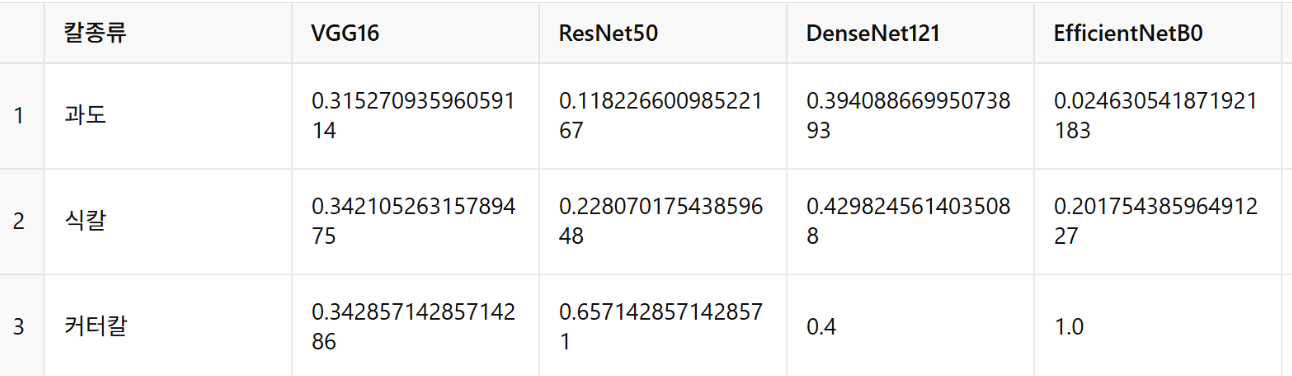

### 분석 요약
- VGG16
→ 세 칼 종류 모두에서 비슷한 중간 성능(31~34%)
→ 특정 칼 종류에 특화되지 않고, 균일한 수준의 분류 성능 보임

- ResNet50
→ 커터칼에서 매우 높은 성능(65.7%),
→ 반면 과도에서는 가장 낮은 정확도(11.8%) → 클래스별 편차 큼

- DenseNet121
→ 모든 칼 종류에서 고른 정확도(39~43%)
→ 안정적인 분류 능력, 전반적으로 가장 일관성 있는 모델

- EfficientNetB0
→ 커터칼에서 유일하게 100% 정확도 달성,
→ 하지만 과도/식칼에선 매우 낮은 정확도 (2~20%) → 특정 클래스에만 특화됨

### 종합 정리
- 가장 안정적인 모델은 DenseNet121: 모든 칼 종류에서 고르게 높은 정확도

- 특정 칼(커터칼)만 탐지해야 한다면 EfficientNetB0가 최적

- ResNet50은 커터칼에는 유리하나, 과도에 취약

- VGG16은 특출나진 않지만 균형 잡힌 보편적 성능

목적에 따라 선택:

- 다양한 칼 종류를 인식해야 하는 서비스 → DenseNet121 추천

- 커터칼만 탐지하는 경고 시스템 등 → EfficientNetB0 활용 가능

➡️ DenseNet121은 모든 칼 종류에서 고른 정확도를 보여, 실사용 환경에 가장 적합한 모델로 평가된다



---



# 4. 종합 분석 및 추천 모델

### 전반적 비교 요약
- DenseNet121은 조도, 오클루전, 배경, 칼 종류 등 모든 조건에서 고르게 안정적인 성능을 보이며, 일관된 인식 능력이 요구되는 상황에 가장 적합한 모델로 평가됨.

- EfficientNetB0는 커터칼 탐지에서 유의미한 성능(100%)을 보였으나, 다른 조건이나 클래스에서는 급격한 성능 하락을 보여 특정 목적용으로만 추천됨.

- ResNet50은 어두운 환경 및 커터칼 분류에 특화된 성능을 보였으나, 조건 변화에 취약해 제한된 환경에서의 사용이 유효함.

- VGG16은 전체적으로 평균 수준의 균형 잡힌 성능을 보이며, 범용적인 베이스라인 모델로 활용 가능함.
---

### 사용 목적에 따른 추천
| 목적                           | 추천 모델              | 사유                    |
| ---------------------------- | ------------------ | --------------------- |
| 다양한 환경(조도, 배경 등)에서의 일관된 칼 탐지 | **DenseNet121**    | 모든 조건에서 안정적인 정확도 유지   |
| 커터칼 탐지에 최적화된 경고 시스템          | **EfficientNetB0** | 커터칼에 대해 100% 정확도 기록   |
| 어두운 환경 중심의 사용                | **ResNet50**       | Low light 조건에서 높은 성능  |
| 보편적 테스트/참조용                  | **VGG16**          | 특정 조건에 치우치지 않은 평균적 성능 |

✔️DenseNet121은 모든 조건에서 안정적이며, 가장 범용성 높은 모델로 평가됨

✔️EfficientNetB0는 특정 클래스에 특화되어 있으나, 전반적 신뢰도는 낮음

✔️ResNet50과 VGG16은 조건에 따라 유불리가 갈리는 특성이 뚜렷함



---



# 5. 마무리 및 기대 효과
### 연구 요약

본 실험은 동일한 조건에서 4개의 사전학습 CNN 모델(VGG16, ResNet50, DenseNet121, EfficientNetB0)을 활용하여 칼 이미지 분류 성능을 비교하였다.

실험은 다양한 조건(조도, 오클루전, 배경, 칼 종류) 하에서 이루어졌으며, 모델별 특징과 강점, 약점을 정량적/정성적으로 분석하였다.

---

### 주요 결과

- DenseNet121은 모든 조건에서 고르게 높은 정확도를 보이며, 실제 응용 가능성이 높은 모델로 확인됨.

- EfficientNetB0는 커터칼 탐지와 같은 특수 목적에 최적화된 모델로, 환경 의존성이 크다는 한계도 함께 나타남.

- 조건별 민감도 분석을 통해, 특정 환경에 맞는 모델 선택 전략의 필요성을 확인할 수 있었음.

### 기대효과 및 활용 방안

- 본 실험은 모델 선택에 있어 조건 기반의 전략적 판단이 중요함을 강조하며, 실제 보안 시스템, 위험 감지 경고 시스템 등에 기초자료로 활용 가능함.

- 향후에는 데이터셋 확장 및 조건 다양화를 통해 보다 일반화된 모델 성능 분석이 필요함.



---




# 6. 본 프로젝트를 통해 성장한 부분
처음에는 YOLO 모델 하나로 조도 변화에 따른 칼 탐지 성능을 평가하는 것이 주제였지만, 실험 방향을 다각도로 고민하면서 이는 단일 모델의 견고함만을 검증하는 실험에 그칠 수 있다는 한계를 느꼈다. 이에 따라, 다양한 CNN 모델(VGG16, ResNet50, DenseNet121, EfficientNetB0)을 비교하는 방향으로 주제를 변경하였다.

또한, 처음에는 단 6개의 영상으로 출발했지만 데이터의 다양성과 조건 간 균형을 고려하다 보니, 점차 데이터셋이 확장되었고, 최종적으로는 19개의 영상을 활용한 나만의 커스텀 데이터셋을 완성하게 되었다. 이 과정에서 실험 설계, 조건 분류, 데이터 주석, 시각화, 분석 등 모든 과정을 스스로 설계하고 추진해 나가며 연구자로서의 자세와 책임감을 실질적으로 체득할 수 있었다.

이번 프로젝트를 통해 단순히 과제를 완수하는 것을 넘어, 스스로 가치 있다고 느끼는 연구를 해내고자 하는 열망을 확인할 수 있었으며, 이를 실제 데이터와 실험으로 실현해낼 수 있었다는 점에서 큰 성장을 느꼈다.


---